## 注意

- 課題に着手する前に，このnotebookをGoogle Driveに保存してください．
- 方法は[第1週の学習用notebook](https://colab.research.google.com/github/yyamnk/numerical-methods-py3/blob/master/exp_python1.ipynb)を参照すること

# 第2週の課題：物体投げ上げのシミュレーション

次の質点の運動について，運動方程式の解を求め，Pythonでplotせよ．

- 高さ$H$[m]のビルから，質量$m$[kg]の物体を水平線から$\theta$[rad]だけ上方に初速$v_o$[m/s]で投げ出す．
- 質点の高さを$y$[m], ビルからの距離を$x$[m]とする．
- 重力加速度を$g$ [m/s^2]とする．

## 手順1

$x$方向と$y$方向について，運動方程式の解を求めよ．

$y$について考えると，
$$
\frac{d y(t)}{dt} = \int -g \ dt = -gt + C_{y1}, \quad C_{y1} = v_0 \sin(\theta) \\
y(t) = \int( -gt + C_{y1} )\ dt = -\frac{1}{2}gt^2 + C_{y1}t + C_{y2}, \quad C_{y2} = H
$$
よって，$y$方向の運動方程式の解は，
$$
y(t) = -\frac{1}{2}gt^2 + v_0 t \sin(\theta) + H
\tag{1}
$$

次に，$x$について考えると，
$$
\frac{d x(t)}{dt} = \int 0 \ dt = C_{x1}, \quad C_{x1} = v_0 \cos(\theta) \\
x(t) = \int C_{x1} \ dt = C_{x1} t + C_{x2}, \quad C_{x2} = 0
$$
よって，$x$方向の運動方程式の解は，
$$
x(t) = v_0 t \cos(\theta)
\tag{2}
$$

## 手順2

前のnotebookで作成した`get_xy`を参考に，求めた運動方程式の解を計算する関数`get_xy45`を作成せよ．

なお，Pythonでは，
- $\cos$は`np.cos()`
- $\sin$は`np.sin()`
- $\pi$は`np.pi`

で計算できる．

In [22]:
import numpy as np
from matplotlib import pyplot as plt

In [48]:
def get_xy45(t, H, v0, g, theta):
    y = -g * t**2 / 2 + v0 * t * np.sin(theta) + H
    x = v0 * t * np.cos(theta)
    return x,y

## 手順3

作成した`get_xy45`を用いて質点の位置を求め，グラフにplotせよ．
ただし．横軸を$x$，縦軸を$y$とし，その他の条件は次のとおりとする．
- plotする時刻$t$の範囲と刻み：0 [s] から10 [s]まで 0.1[s]刻み
- $H = 333$ [m]
- $g = 30$ [m/s^2]
- $v_0 = 5$ [m/s]
- $\theta = \pi/4$ [rad]

In [59]:
# H = 333
H = 0
v0 = 30
g = 9.8
theta = np.pi / 4

ts = np.arange(start=0, stop=10, step=0.1)
xs = np.zeros(len(ts))
ys = np.zeros(len(ts))

for i in range(0, len(ts)):
    t = ts[i]
    xs[i], ys[i] = get_xy45(t, H, v0, g, theta)

Text(0, 0.5, 'y [m]')

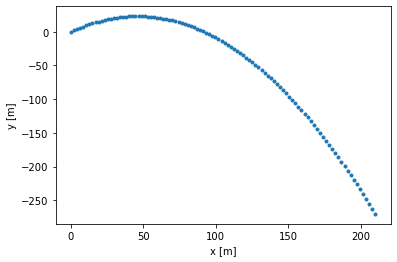

In [66]:
plt.plot(xs, ys, '.')
plt.xlabel('x [m]')
plt.ylabel('y [m]')

<ipython-input-67-118d90be4ccf>:5: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.axes().set_aspect('equal') # グラフのアスペクト比を揃える


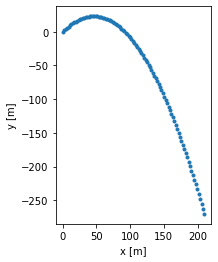

In [67]:
# グラフの縦横比を合わせる場合
plt.plot(xs, ys, '.')
plt.xlabel('x [m]')
plt.ylabel('y [m]')
plt.axes().set_aspect('equal') # グラフのアスペクト比を揃える

# 手順4

$\theta=\pi / 2$[rad]として，同様にシミュレーションせよ．また，その結果が妥当であるかを考察せよ．

In [70]:
H = 333
v0 = 30
g = 9.8
theta = np.pi / 2

ts = np.arange(start=0, stop=10, step=0.1)
xs = np.zeros(len(ts))
ys = np.zeros(len(ts))

for i in range(0, len(ts)):
    t = ts[i]
    xs[i], ys[i] = get_xy45(t, H, v0, g, theta)

Text(0, 0.5, 'y [m]')

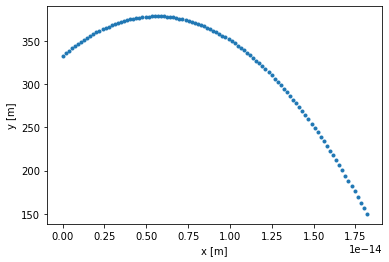

In [71]:
plt.plot(xs, ys, '.')
plt.xlabel('x [m]')
plt.ylabel('y [m]')

一見，斜めに物体が飛んでいるように見えるが，$x$方向の変位は極めて微小である．これは，`np.pi / 2`の数値計算誤差によるもの．

# 手順4

この運動において，質点は$y=0$[m]で床に衝突し，弾性係数0.9で跳ね返るものとする．
この質点の運動は，これまで学習した内容でシミュレーションできるか？できる場合は，それを実装せよ．できない場合は，その理由を考えよ．

おそらくできない．

運動方程式の解を求める方法では，初期値と積分定数を用いている．
弾性衝突の場合は，それら初期値と積分定数を，衝突毎に算出する必要があり，これまでの計算では難しい（やろうと思えばできそうだけど，想定していない）